In [ ]:
!pip install tensorflow-2.0.0-cp37-cp37m-win_amd64.whl

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pylab inline
import pandas as pd
import h5py

Populating the interactive namespace from numpy and matplotlib


# Aplicación Redes Neuronales.

In [3]:
#Cargando los datos.
test = h5py.File('/content/drive/MyDrive/test_catvnoncat.h5', 'r')
train = h5py.File('/content/drive/MyDrive/train_catvnoncat.h5', 'r')

#Separando el cojunto de entrenamiento.
x_train = np.array(train['train_set_x'][:])
y_train = np.array(train['train_set_y'][:])

#Separando el cojunto de prueba.
x_test = np.array(test['test_set_x'][:])
y_test = np.array(test['test_set_y'][:])

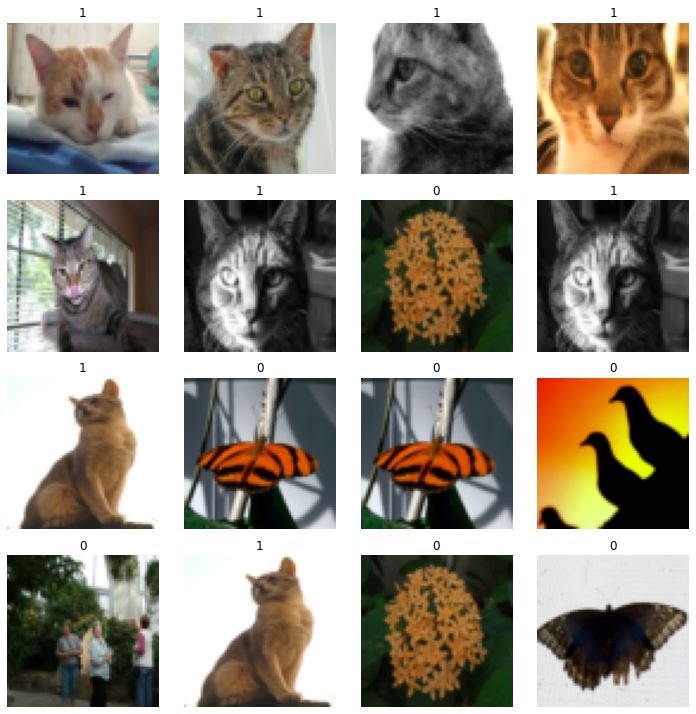

In [4]:
#Visualización de algunas imágenes y sus etiquetas.
n_samples=np.random.randint(0,x_test.shape[0],16)
ran_indx_matrix=n_samples.reshape(4,4)

fig,ax=plt.subplots(4,4,figsize=(10,10))
for i in range(0,ran_indx_matrix.shape[0]):
    for j in range(0,ran_indx_matrix.shape[1]):
        #the ij entry of this matrix is the random index of the image.
        k=ran_indx_matrix[i,j]
        
        #converting the 1D array of pixels into a 2D array of 28x28 image.
        b=x_test[k]
        
        #ploting the image.
        ax[i,j].imshow(b)
        ax[i,j].set_title(y_test[k])
        ax[i,j].set_axis_off()
        
#setting the separation between subplots.        
fig.tight_layout(pad=1.0)

La tarea del modelo será hacer una clasificación de las imágenes en las categorías de *gato* ($1$) y *no gato* ($0$).

In [5]:
x_train.shape

(209, 64, 64, 3)

El dataset está compuesto de $209$ imágenes de $64\times64$ en $3$ canales, en su lugar deberíamos trabajar con imágenes convertidas en vectores de longitud $64\times64\times3=12288$. Además vamos a normalizar las imágenes, de manera que los valores estarán entre $0$ y $1$.

In [6]:
x_train = x_train.flatten().reshape(209, 64*64*3)/255
x_test = x_test.flatten().reshape(50, 64*64*3)/255

In [7]:
x_train.shape

(209, 12288)

In [8]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

## 1. Construcción del modelo.

In [9]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

La arquitectura del modelo es la siguiente.

In [10]:
INPUT_SHAPE = 64*64*3

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=INPUT_SHAPE))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Definimos tres parámetros de ejecución del modelo:
* El optimizador mediante el cual se hará el ajuste de los parámetros del modelo, en lugar de GD es Adam.
* La función de coste es en este caso `binary_crossentropy` porque tratamos con solo dos categorías.
* La métrica con la que vamos a evaluar el desempeño del modelo es*accuracy*.

In [12]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

Alguna información del modelo se puede obtener con el siguiente comando.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 6,555,137
Trainable params: 6,555,137
Non-trainable params: 0
_________________________________________________________________


Procedemos con el entrenamiento.

In [12]:
EPOCHS = 200
print('Training model...\n')
myhistory = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=16,verbose=0)

Training model...



Evaluamos el modelo con una gráfica de *accuracy* respecto a las épocas de entrenamiento.

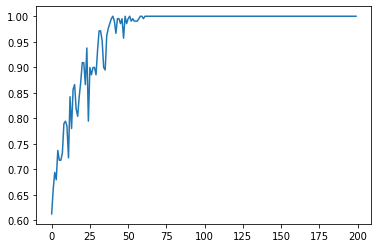

In [13]:
xvals=range(EPOCHS)
plt.plot(xvals,myhistory.history['accuracy'])
plt.show()

Esta gráfica de *accuracy* nos muestra que el número de épocas de entrenamiento puede reducirse a menos de $100$.

Además de hacer una prueba con el *test_set*.

In [14]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 1.6174 - accuracy: 0.8200


[1.6174224615097046, 0.8199999928474426]

La precisión del modelo en el conjunto de prueba alcanza el $82\%$.